<a href="https://colab.research.google.com/github/nachospimp/pf/blob/main/LinearRegression_Predicci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
import yfinance as yf
import numpy as np

In [122]:
df = yf.download('BTC-USD', start='2020-01-01')

[*********************100%%**********************]  1 of 1 completed


In [123]:
df['Returns'] = np.log(df.Close.pct_change() + 1)

In [124]:
def lagit(df, lags):
  names = []
  for i in range(1, lags+1):
    df['Lag_'+str(i)] = df['Returns'].shift(i)
    names.append('Lag_'+str(i))
  return names

In [125]:
lagnames = lagit(df,2)

In [126]:
df.dropna(inplace=True)

In [127]:
from sklearn.linear_model import LinearRegression

In [128]:
model = LinearRegression()

In [129]:
model.fit(df[lagnames], df['Returns'])

LinearRegression()

In [130]:
df['prediction_LR'] = model.predict(df[lagnames])

In [131]:
df['direction_LR'] = [1 if i > 0 else -1 for i in df.prediction_LR]

In [132]:
df['strat_LR'] = df['direction_LR'] * df['Returns']

In [133]:
np.exp(df[['Returns','strat_LR']].sum())

Returns     8.779551
strat_LR    4.317129
dtype: float64

<Axes: xlabel='Date'>

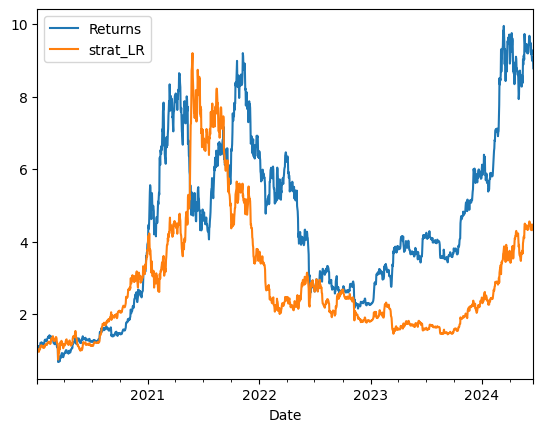

In [134]:
np.exp(df[['Returns','strat_LR']].cumsum()).plot()

In [135]:
from sklearn.model_selection import train_test_split

In [136]:
train, test = train_test_split(df, shuffle=False,
                               test_size=0.3, random_state=0)

In [137]:
train = train.copy()

In [138]:
test = test.copy()

In [139]:
model = LinearRegression()

In [140]:
test

,Open,High,Low,Close,Adj Close,Volume,Returns,Lag_1,Lag_2,prediction_LR,direction_LR,strat_LR
Date,,,,,,,,,,,,
2023-02-16,24307.349609,25134.117188,23602.523438,23623.474609,23623.474609,39316664596,-0.028558,0.089770,0.018747,-0.003066,-1,0.028558
2023-02-17,23621.283203,24924.041016,23460.755859,24565.601562,24565.601562,41358451255,0.039106,-0.028558,0.089770,0.006999,1,0.039106
2023-02-18,24565.296875,24798.835938,24468.373047,24641.277344,24641.277344,19625427158,0.003076,0.039106,-0.028558,-0.002197,-1,-0.003076
2023-02-19,24640.027344,25093.054688,24327.642578,24327.642578,24327.642578,25555105670,-0.012810,0.003076,0.039106,0.002906,1,-0.012810
2023-02-20,24336.623047,25020.458984,23927.910156,24829.148438,24829.148438,28987376573,0.020405,-0.012810,0.003076,0.002240,1,0.020405
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-14,66747.570312,67294.648438,65056.894531,66011.093750,66011.093750,27403884779,-0.011227,-0.021998,0.013412,0.003235,1,-0.011227
2024-06-15,66006.742188,66402.187500,65871.773438,66191.000000,66191.000000,14121265576,0.002722,-0.011227,-0.021998,0.001038,1,0.002722
2024-06-16,66189.359375,66894.843750,66018.250000,66639.046875,66639.046875,13281140541,0.006746,0.002722,-0.011227,0.000699,1,0.006746


In [141]:
model.fit(train[lagnames], train['Returns'])

LinearRegression()

In [142]:
test['prediction_LR'] = model.predict(test[lagnames])

In [143]:
test['direction_LR'] = [1 if i > 0 else -1 for i in test.prediction_LR]

In [144]:
test['strat_LR'] = test['direction_LR'] * test['Returns']

In [145]:
np.exp(test[['Returns','strat_LR']].sum())

Returns     2.652839
strat_LR    2.145640
dtype: float64

<Axes: xlabel='Date'>

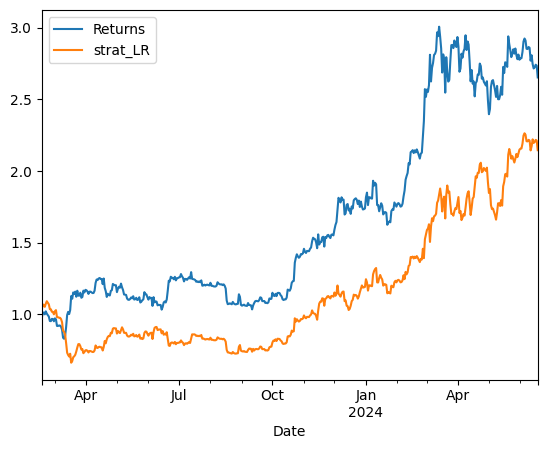

In [146]:
np.exp(test[['Returns','strat_LR']].cumsum()).plot()

In [147]:
(test['direction_LR'].diff() != 0).value_counts()

direction_LR
False    269
True     220
Name: count, dtype: int64